# Computación Científica II
## Laboratorio  #2
    
   Gabriela González Toledo      gabriela.gonzalez@alumnos.usm.cl  201173017-8
   
   Ian Zamorano Escobedo         Ian.zamorano.12@sansano.usm.cl    201273018-k

In [3]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

import timeit
from math import ceil, floor
from sympy import *
from sympy.abc import *
from scipy.special import gamma

%load_ext line_profiler

ImportError: No module named scipy.special

### Introducción:

El presente laboratorio tiene como objetivo comprender y aplicar los métodos de Integración Numérica. Para esto implementaremos  los cuatro métodos vistos en clases. En la primera parte trabajaremos aplicando los métodos a una integral impropia, haciendo un cambio de variable y calculando los tiempos de ejecución de cada método. La segunda parte consta de implementar un método para calcular derivadas fraccionarias y hacer cálculos de algunas derivadas para luego analizar su comportamiento al variar la fracción entre sus enteros superior e inferior.

### Integración impropia

#### 1. Cambio de variable:

$$
u = \frac{2}{\pi} arctan(t) \qquad \infty < t < \infty, \qquad -1 < u < 1
$$

$$
tan\left(\frac{\pi}{2}u\right)=t \qquad \rightarrow \qquad dt = \frac{\pi}{2} sec\left(\frac{\pi}{2}u\right)^{2}
$$

$$
\frac{1}{2\sqrt{2\pi}} \int_{-\infty}^{x} e^{-\frac{t^{2}}{2}} dt = \frac{\pi}{2\sqrt{2\pi}}\int_{-1}^{\frac{2}{\pi}arctan(x)} \frac{e^{\frac{-tan(\frac{\pi u}{2})^2}{2}}}{cos(\frac{\pi }{2})^{2}} du
$$

#### 2. Métodos de integración:

In [4]:
#Midpoint rule
def midpoint(f,a,b,n):
    x = np.linspace(a,b,n+1) # n
    dx = x[1]-x[0] # 1
    w = x[:-1] + 0.5*dx # n(sumas)*1
    val = dx * sum(f(w)) # 1 + n(sumas) + nf
    return val # (3+f) * n + 2

#Trapezoid Method
def trapezoid(f,a,b,n):
    x = np.linspace(a,b,n+1) # n
    dx = x[1]-x[0] # 1
    xl = x[:-1] # 1
    xr = x[1:] # 1
    val = 0.5*dx*sum(f(xl)+f(xr)) # 1 + 1 + 2(n-1)(sumas) + 2(n-1)f
    return val # 4(n-1)n + n +5 

#Simpson’s Rule
def simpsons(f,a,b,n):
    if n%2 == 1:
        print "Simpson's Rule es aplicable solo para numero par de segmentos"
        return None
    x = np.linspace(a,b,n+1) # n
    dx = (x[1] - x[0]) # 1
    xl = x[:-2:2] # 1
    xmid = x[1::2] # 1
    xr = x[2::2] # 1
    val = (dx/3.0)*sum(f(xl)+4*f(xmid) + f(xr)) # 2 + (n-2)(sumas) + 3(n-2)f 
    return val #  (n-2)(sumas) + 3(n-2)f + n + 6 

#Gaussian Quadrature
def gaussian_NodesWeights(n):
    if n == 1:
        return np.array([1]), np.array([2])
    beta = 0.5/np.sqrt(1.-(2.*np.arange(1.,n))**(-2))   
    T = np.diag(beta,1) + np.diag(beta,-1)
    D,V = np.linalg.eigh(T) 
    x = D
    w = 2*V[0,:]**2
    return x,w

def gaussianquad(f,a,b,n):
    x,w = gaussian_NodesWeights(n)
    x = np.array(x)
    w = np.array(w)
    x = x[np.where(x < b)]
    w = w[:len(x)]
    
    val = sum(w*f(x)) # n(sumas) + n(mutiplicaciones) + fn
    return val
    
    

Para los calculos de complejidad algoritmica se considerara la constante $f$ como el costo de evaluar la funcion en un numero.
Dentro de los comentarios de los algoritmos se tiene el desglose de las complejidades.

Midpoint rule.

$(3+f) * n + 1 -> O(n)$

Trapezoid Method

$4(n-1)n + n +5  -> O(n)$

Simpson’s Rule

$(n-2)(sumas) + 3(n-2)f + n + 6  -> O(n)$

Gaussian Quadrature

$n(sumas) + n(mutiplicaciones) + fn -> O(n)$


#### 3.  Cálculo de integral

In [7]:
# calculo de tiempos de metodos
const =  np.pi/(2*np.sqrt(2*np.pi))
mid_times =[]
trape_times = []
simp_times = []
gauss_times = []
params = []
for alpha in range(50):
    a= -1
    b= 2/np.pi *np.arctan(float(10**alpha))
    f = lambda y : const * np.exp(-np.tan((np.pi*y)/2)**2/2)/np.cos((np.pi*y)/2)**2
    params.append(float(10**alpha))
    tp_mid = %timeit -o midpoint(f,a,b,100)
    mid_times.append(tp_mid.best)
    tp_trape =  %timeit -o trapezoid(f,a,b,100)
    trape_times.append(tp_trape.best)
    tp_simp = %timeit -o simpsons(f,a,b,100)
    simp_times.append(tp_simp.best)
    tp_gauss = %timeit -o gaussianquad(f,a,b,100)
    gauss_times.append(tp_gauss.best)
    


10000 loops, best of 3: 63.4 µs per loop
10000 loops, best of 3: 99 µs per loop
10000 loops, best of 3: 111 µs per loop
The slowest run took 98.09 times longer than the fastest. This could mean that an intermediate result is being cached 
1000 loops, best of 3: 1.68 ms per loop
10000 loops, best of 3: 64.5 µs per loop
10000 loops, best of 3: 94.9 µs per loop
10000 loops, best of 3: 112 µs per loop
100 loops, best of 3: 1.65 ms per loop
10000 loops, best of 3: 64.3 µs per loop
10000 loops, best of 3: 94.5 µs per loop
10000 loops, best of 3: 121 µs per loop
1000 loops, best of 3: 2 ms per loop
10000 loops, best of 3: 64.5 µs per loop
10000 loops, best of 3: 93.9 µs per loop
10000 loops, best of 3: 108 µs per loop
The slowest run took 6.18 times longer than the fastest. This could mean that an intermediate result is being cached 
100 loops, best of 3: 1.68 ms per loop
10000 loops, best of 3: 64.8 µs per loop
10000 loops, best of 3: 93.9 µs per loop
10000 loops, best of 3: 117 µs per loop


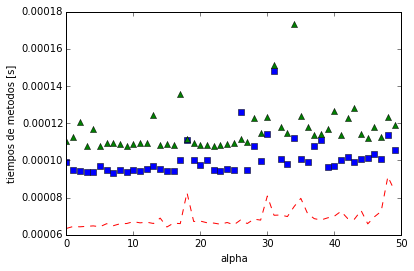

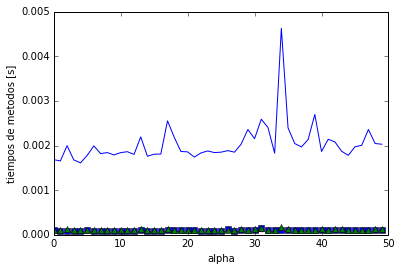

In [8]:
# graficos para tiempos de de ejecucion de metodos
%matplotlib inline
# grafico de tiempos de midpoint, trapezoid, simpsons vs alpha
plt.plot(range(50), mid_times, 'r--')
plt.plot(range(50), trape_times,'bs')
plt.plot(range(50), simp_times, 'g^')
plt.xlabel('alpha')
plt.ylabel('tiempos de metodos [s] ')
plt.show()
# grafico de tiempos de midpoint, trapezoid, simpsons, gaussian quadrature vs alpha
plt.plot(range(50), mid_times, 'r--')
plt.plot(range(50), trape_times,'bs')
plt.plot(range(50), simp_times, 'g^')
plt.plot(range(50), gauss_times)
plt.xlabel('alpha')
plt.ylabel('tiempos de metodos [s]')
plt.show()

In [10]:
# calculo de resultados de la integracion

const =  np.pi/(2*np.sqrt(2*np.pi))
haches = [0.001,0.01, 0.1]
mid_result = []
trape_result = []
simp_result = []
gauss_result = []
results = []
f = lambda y : const * np.exp(-np.tan((np.pi*y)/2)**2/2)/np.cos((np.pi*y)/2)**2
for h in haches:
    for alpha in range(50):
        a= -1
        b= 2/np.pi *np.arctan(float(10**alpha))
        n = int((b-a)/h)
        if (n % 2) != 0: # para poder realizar metodo de simpson y tener un numero par de segmentos
            n += 1
        mid_result.append(midpoint(f,a,b,n))
        trape_result.append(trapezoid(f,a,b,n))
        simp_result.append(simpsons(f,a,b,n))
        gauss_result.append(gaussianquad(f,a,b,n))
    results.append((mid_result, trape_result, simp_result, gauss_result))
    mid_result = []
    trape_result = []
    simp_result = []
    gauss_result = []

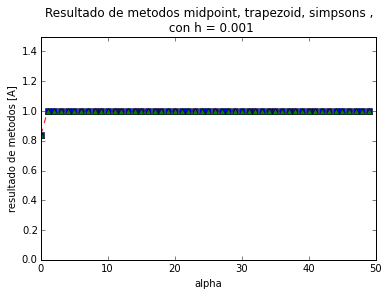

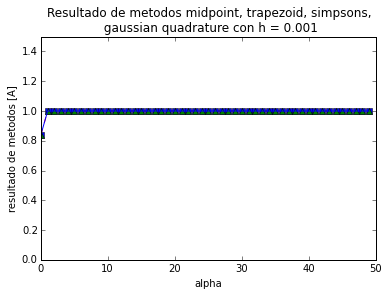

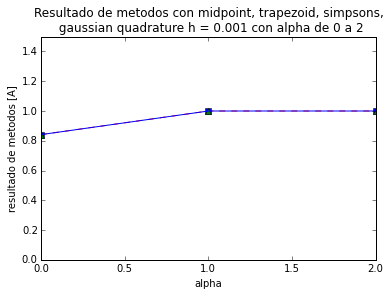

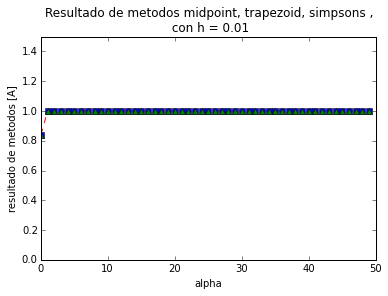

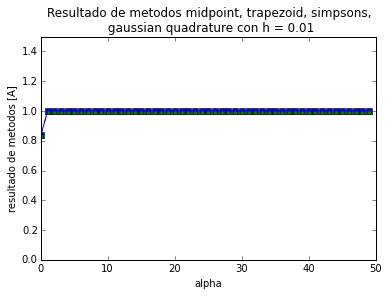

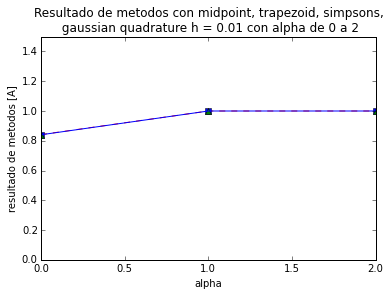

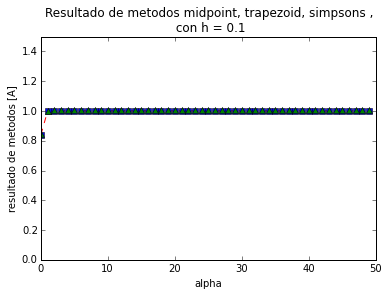

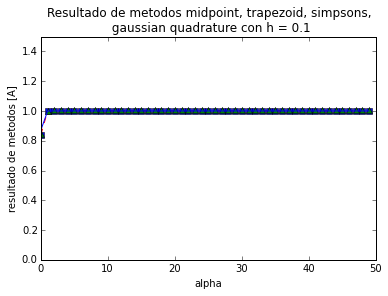

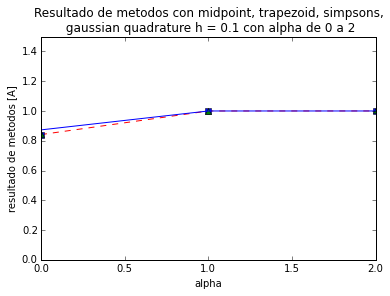

In [11]:
%matplotlib inline

for i in range(len(haches)):
    # grafico de tiempos de midpoint, trapezoid, simpsons vs alpha para h respectivo
    plt.plot(range(50), results[i][0], 'r--')
    plt.plot(range(50), results[i][1],'bs')
    plt.plot(range(50), results[i][2], 'g^')
    plt.title("Resultado de metodos midpoint, trapezoid, simpsons ,\n con h = " + str(haches[i]))
    plt.xlabel('alpha')
    plt.ylabel('resultado de metodos [A] ')
    plt.ylim(0,1.5)
    plt.show()

    # grafico de tiempos de midpoint, trapezoid, simpsons, gaussian quadrature vs alpha
    plt.plot(range(50), results[i][0], 'r--')
    plt.plot(range(50), results[i][1],'bs')
    plt.plot(range(50), results[i][2], 'g^')
    plt.plot(range(50), results[i][3] )
    plt.title("Resultado de metodos midpoint, trapezoid, simpsons, \n gaussian quadrature con h = " + str(haches[i]))
    plt.xlabel('alpha')
    plt.ylabel('resultado de metodos [A]')
    plt.ylim(0,1.5)
    plt.show()

    # grafico de tiempos de midpoint, trapezoid, simpsons, gaussian quadrature vs alpha in  [0, 2] 
    plt.plot(range(3), results[i][0][:3], 'r--')
    plt.plot(range(3), results[i][1][:3],'bs')
    plt.plot(range(3), results[i][2][:3], 'g^')
    plt.plot(range(3), results[i][3][:3])
    plt.title("Resultado de metodos con midpoint, trapezoid, simpsons, \n gaussian quadrature h = " + str(haches[i]) + " con alpha de 0 a 2")
    plt.xlabel('alpha')
    plt.ylabel('resultado de metodos [A]')
    plt.ylim(0,1.5)
    plt.show()

Como podemos observar, todos los metodos convergen rapidamente al mismo resultado para los distintos 'h', esto en su gran parte es debido a la naturaleza de la funcion y los puntos que estamos evaluando. 
Aunque en el ultimo grafico, con h=0.1 y alpha de 0 a 2 , se observa que midpoint no se ajusta tanto al valor real, esto es debido al h.

#### 4. Caso x=0

Cuando en una distribucion normal centrada se desea calcular la integral desde $-\infty$ hasta 0, siempre se obtiene el valor 0.5, como podemos ver con nuestro cambio de variable, al evaluar en estos limites no existen indefiniciones, por lo cual podemos aplicar cualquier metodo, elegimos midpoint, dado que se acerca de forma precisa al valor real y tiene bajo tiempo de conputo.

In [10]:
const =  np.pi/(2*np.sqrt(2*np.pi))
f = lambda y : const * np.exp(-np.tan((np.pi*y)/2)**2/2)/np.cos((np.pi*y)/2)**2
a = -float("inf")
b = 0
newa = 2/np.pi *np.arctan(a)
newb = 2/np.pi *np.arctan(b)
print "Metodo Simpson para t in (-inf,0] : ", midpoint(f,newa,newb,100)

Metodo Simpson para t in (-inf,0] :  0.5


#### 5. Aproximación de la integral en intervalo (-inf,inf)

Al igual que en la pregunta anterior, sabemos que es una distribucion normal, por lo que la integral en todo su dominio sera 1, dado nuestro cambio de variable, no existen incombenientes, dado que nuestro cambio incluyen evaluaciones de u en tangente, como sabemos que realmente la tangente se calcula a traves de una serie que toma n puntos para aproximar al valor real, esta llega a un numero muy grande, pero no a $-\infty$ ni $\infty$, por lo que no existen indefiniciones al evaluar. 

In [11]:
const =  np.pi/(2*np.sqrt(2*np.pi))
f = lambda y : const * np.exp(-np.tan((np.pi*y)/2)**2/2)/np.cos((np.pi*y)/2)**2
a = -float("inf")
b = float("inf")
newa = 2/np.pi *np.arctan(a)
newb = 2/np.pi *np.arctan(b)
print "Metodo Simpson para t in (-inf,inf)", midpoint(f,newa,newb,100)

Metodo Simpson para t in (-inf,inf) 0.999999999979


### The Caputo's Fractional Derivative

#### 1. Cambio de variable

$$
\int_{a}^{b} f(x) dx = \frac{b-a}{2} \int_{-1}^{1} f \left( \frac{b-a}{2}y + \frac{1+b}{2} \right) dy
$$ 

$$
    \frac{1}{\Gamma(1-\alpha)} \int_{a}^{t} \frac{f'(\tau)}{t-\tau} d\tau =\frac{t-a}{\Gamma(1-\alpha)} \int_{-1}^{1} \frac{f'(\frac{(t-a)y}{2} + \frac{t+a}{2})}{(\frac{t}{2}-\frac{(t-a)y}{2} - \frac{a}{2})^{\alpha}} dy
$$

#### 2.Implementación  

In [6]:
def fraction_diff(f,t,alpha, a):
    if type(f) == int:
        return 0 
    if alpha>0 and alpha<1:
        const = (t-a)/gamma(1-alpha)
        df = diff(f)
        f_n = df.subs({T:((t*(y+1)+a*(1-y))/2)})
        func = f_n*const/(((t*(1-y)+a*(y-1))/2)**alpha)
        d_alpha= lambdify([y], func , modules=['numpy'])
        return gaussianquad(d_alpha, -1,1,10)
    elif alpha<0:
        print "Derivada Invalida"
    elif alpha == int(alpha):
        df = diff(f,T,alpha)
        d_alpha = lambdify([T], df , modules=['numpy'])
        return d_alpha(t)
    else:
        alph = alpha - int(alpha)
        const = (t-a)/gamma(1-alph)
        df = diff(f,T, int(alpha))
        new_df = diff(df)
        f_n = new_df.subs({T:((t*(y+1)+a*(1-y))/2)})
        func = f_n*const/(((t*(1-y)+a*(y-1))/2)**alph)
        d_alpha = lambdify([y], func , modules=['numpy'])
        return gaussianquad(d_alpha,-1,1,10)

#### 3. Cálculo de integrales

Para el cálculo de las derivadas tomamos t = 2 y a =0, pues t está entre [0, 2$\pi$] y a pertenece a los reales.

a) Alpha = 0.2 :  0


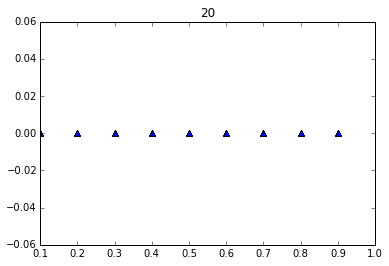

b) Alpha = 1.5 :  -2.4796786852


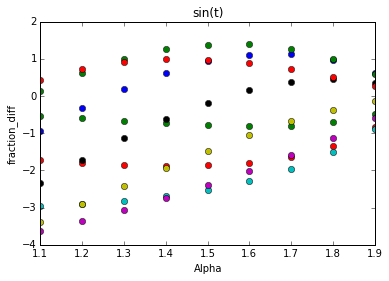

c) Alpha = 46.4 :  13.3939387244


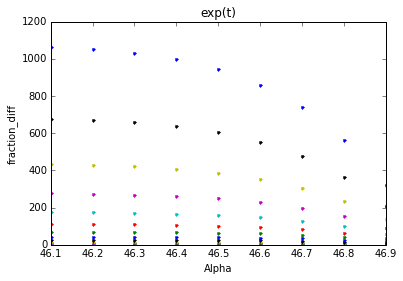

d) Alpha = 0.7 :  2.30538253273


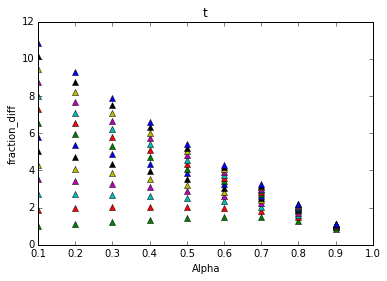

e) Alpha = 0.3 :  8.11993193619


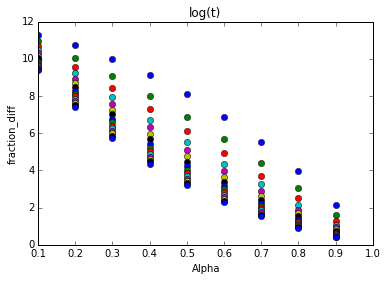

f) Alpha = 0.5 :  7.98081095136


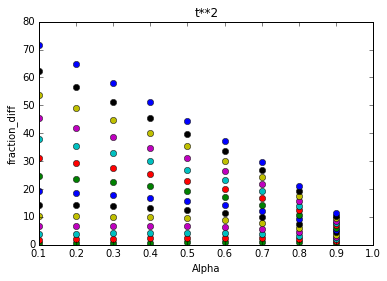

g) Alpha = 0.5 :  1.03201785768


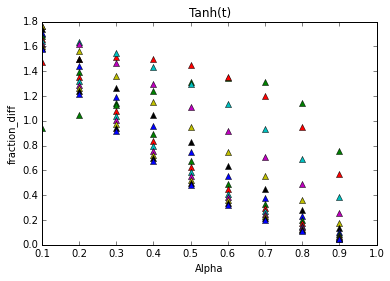

In [21]:
%matplotlib inline
#Derivada de la funcion = 20  para alpha = 0.2
func = 20
plt.title('20')
print 'a) Alpha = 0.2 : ',fraction_diff(func,2,0.2,0)
for j in np.linspace(0, 2*np.pi , 15):
    a = list()
    for i in np.linspace(0.1,0.9,9):
        a.append(fraction_diff(func,j,i,0))
    plt.plot(np.linspace(0.1,0.9,9),a, '^')
plt.show()
#Derivada de la funcion = sin(T)  para alpha = 1.5
func = sin(T)
plt.title('sin(t)')
print 'b) Alpha = 1.5 : ',fraction_diff(func,2,1.5,0)
for j in np.linspace(0, 2*np.pi , 10):
    b = list()
    for i in np.linspace(1.1,1.9,9):
        b.append(fraction_diff(func,j,i,0))
    plt.plot(np.linspace(1.1,1.9,9),b, 'o')
plt.xlabel('Alpha')
plt.ylabel('fraction_diff')
plt.show()
#Derivada de la funcion = exp(T)  para alpha = 46.4
func = exp(T)
plt.title('exp(t)')
print 'c) Alpha = 46.4 : ',fraction_diff(func,2,46.4,0)
for j in np.linspace(0, 2*np.pi , 15):
    c = list()
    for i in np.linspace(46.1,46.9,9):
        c.append(fraction_diff(func,j,i,0))
    plt.plot(np.linspace(46.1,46.9,9),c, '.')
plt.xlabel('Alpha')
plt.ylabel('fraction_diff')
plt.show()
#Derivada de la funcion = T  para alpha = 0.7
func = T
plt.title('t')
print 'd) Alpha = 0.7 : ',fraction_diff(func,2,0.7,0)
for j in np.linspace(0, 2*np.pi , 15):
    d = list()
    for i in np.linspace(0.1,0.9,9):
        d.append(fraction_diff(func,j,i,0))
    plt.plot(np.linspace(0.1,0.9,9),d, '^')
plt.xlabel('Alpha')
plt.ylabel('fraction_diff')
plt.show()
#Derivada de la funcion = log(T)  para alpha = 0.3
func = log(T)
plt.title('log(t)')
print 'e) Alpha = 0.3 : ',fraction_diff(func,2,0.3,0)
for j in np.linspace(1, 2*np.pi , 15):
    e = list()
    for i in np.linspace(0.1,0.9,9):
        e.append(fraction_diff(func,j,i,0))
    plt.plot(np.linspace(0.1,0.9,9),e, 'o')
plt.xlabel('Alpha')
plt.ylabel('fraction_diff')
plt.show()
#Derivada de la funcion = T**2  para alpha = 0.5
func = T**2
plt.title('t**2')
print 'f) Alpha = 0.5 : ',fraction_diff(func,2,0.5,0)
for j in np.linspace(0, 2*np.pi , 15):
    f = list()
    for i in np.linspace(0.1,0.9,9):
        f.append(fraction_diff(func,j,i,0))
    plt.plot(np.linspace(0.1,0.9,9),f, 'o')
plt.xlabel('Alpha')
plt.ylabel('fraction_diff')
plt.show()
#Derivada de la funcion = tanh(t)  para alpha = 0.5
func = tanh(T)
plt.title('Tanh(t)')
print 'g) Alpha = 0.5 : ',fraction_diff(func,2,0.5,0)
for j in np.linspace(0, 2*np.pi , 15):
    g = list()
    for i in np.linspace(0.1,0.9,9):
        g.append(fraction_diff(func,j,i,0))
    plt.plot(np.linspace(0.1,0.9,9),g, '^')
plt.xlabel('Alpha')
plt.ylabel('fraction_diff')
plt.show()

 Para cada grafico, tomamos 15 valores para $t$ entre $[0 ,2\pi]$ y aplicamos el método para derivar cambiando el valor de la fracción entre los enteros superior e inferior del alpha dado.  Podemos ver que para todos los valores de t, a medida que alpha se hace mas cercano a un entero, la grafica se va pareciendo mas a la de la derivada de la función dada.

### Conclusión:

Es importante analizar teoricamente el comportamiento de la funcion que se desea integrar, dado que esto condice los parametros a utilizar y el metodo coorecto para esto, dado que en este caso el metodo mas conveniente es midpoint, dado que este tiene menor complejiidad y tiene gran presicion, en este caso, pero podria ser distinto si lo aplicamos a otra funcion. Por otro lado las distintas aplicaciones que podemos dar a los metodos de integracion, por ejemplo lo visto en el segundo punto del laboratorio al calcular las derivadas fraccionarias.

http://www.wolframalpha.com/input/?i=arctg%282%2FPi+*+t%29

http://docs.sympy.org/dev/modules/core.html#module-sympy.core.function
